In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

In [95]:
import json

In [96]:
with open("the_last_final_data_10min.json", 'r', encoding='UTF-8') as f:
    data = json.load(f)

In [97]:
NEW_COL = ['name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1',
       'sell_1', 'buy_1', 'volume_1', 'variation_1', 'post_num_1',
       'unique_id_1', 'click_1', 'like_1', 'dislike_1', 'time_2', 'price_2',
       'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2',
       'post_num_2', 'unique_id_2', 'click_2', 'like_2', 'dislike_2', 'time_3',
       'price_3', 'price_dif_3', 'sell_3', 'buy_3', 'volume_3', 'variation_3',
       'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3',
       'mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend', 'price_increase', 'did_price_increase', 'did_price_033',
       'did_price_100', 'did_price_150', 'kospi_ind', 'kosdaq_ind',
       'time_slot', 'ko_inter', 'early_mor', 'morning', 'lunch', 'afternoon',
       'late', 'mkt_change', 'alpha', 'per_now', 'did_opening_price_increase']

In [98]:
df = pd.DataFrame(data, columns = NEW_COL)
df = df.dropna(axis=0, how='any')
df = df[df.did_opening_price_increase == 1]

In [99]:
time_filter = (df['time'].str.startswith("2018-02-21")) | \
              (df['time'].str.startswith("2018-02-22")) | \
              (df['time'].str.startswith("2018-02-23")) | \
              (df['time'].str.startswith("2018-02-26")) 
        
train_df = df[time_filter].reset_index(drop = True)
test_df = df[~time_filter].reset_index(drop = True)

In [100]:
COL_DROP = ['name', 'code', 'time', 'price', 'time_1', 'time_2', 'time_3',
            'did_price_increase', 'did_price_033', 'did_price_100', 'did_price_150', 
            'price_increase', 'did_opening_price_increase', ]
X = df.drop(COL_DROP, axis = 1)
y_inc = df['price_increase']
y_0 = df['did_price_increase']
y_33 = df['did_price_033']
y_100 = df['did_price_100']
y_150 = df['did_price_150']
X_train = train_df.drop(COL_DROP, axis = 1)
X_test = test_df.drop(COL_DROP, axis = 1)
y_train_in = train_df['price_increase']
y_train_0 = train_df['did_price_increase']
y_train_33 = train_df['did_price_033']
y_train_100 = train_df['did_price_100']
y_train_150 = train_df['did_price_150']
y_test_in = test_df['price_increase']
y_test_0 = test_df['did_price_increase']
y_test_33 = test_df['did_price_033']
y_test_100 = test_df['did_price_100']
y_test_150 = test_df['did_price_150']

Random Forest

In [74]:
tree_random = RandomForestClassifier(n_estimators = 100, max_features = 3, \
                                     bootstrap = True, oob_score = True, 
                                     random_state = 25)
tree_random.fit(X_train_sub, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=25, verbose=0, warm_start=False)

In [75]:
y_pred = tree_random.predict(X_test_sub)

In [76]:
y_port = y_test_in[y_pred == 1]

In [77]:
y_test_in.mean()

-0.01650359124664549

In [78]:
y_port.mean()

0.12705774581363627

In [73]:
y_port

2       0.000000
30      0.000000
35      1.108033
62     -0.896861
140     0.668896
152    -2.123552
154    -0.452489
203     0.487805
243     0.478469
246    -4.090909
338     3.317536
415    -0.194175
428     0.000000
430     0.000000
491    -0.575356
519    -0.242131
583    -0.064298
663     0.497512
735     0.153846
782     0.140252
783     0.198807
900     0.000000
979    -0.484262
992     0.393701
1031    1.617796
1053   -0.358423
1071    0.243309
1145    0.000000
1182    0.283286
1272   -0.160000
1360    0.000000
1364    0.961538
1439    0.000000
1442    0.103306
1452    0.395257
1456    1.904762
1534    0.928793
1623    0.242718
1626   -0.306748
1658    1.171875
1715    0.000000
1728    0.000000
1820    0.395257
1912   -0.393701
1916   -0.156986
1934    0.120919
2296    0.716846
2411    0.294118
2671    0.358423
2674   -0.184843
2693    0.245700
2708   -0.174216
2733   -0.174520
2751    0.669344
2783   -0.177305
2808   -0.532860
Name: price_increase, dtype: float64

In [59]:
print(classification_report(y_test_0, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.83      0.75      1884
          1       0.41      0.24      0.30       948

avg / total       0.59      0.63      0.60      2832



In [41]:
X.shape

(12700, 65)

In [52]:
def get_best_feature(num):
    rv = 0
    f_num = 1
    for i in range(1, num):
        tree_random = RandomForestClassifier(n_estimators = 100, \
                      max_features = i, bootstrap = True,\
                      oob_score = True, random_state = 0)
        tree_random.fit(X_train_sub, y_train_0)
        y_pred = tree_random.predict(X_test_sub)
        y_port = y_test_in[y_pred == 1]
        avg = y_port.mean()
        if avg > rv:
            f_num = i
            rv = avg
        print(f_num)
        
    return f_num

In [79]:
#get_best_feature(40)

In [44]:
FEATURES = X.columns

In [45]:
importances = tree_random.feature_importances_  
ranks = np.argsort(importances)[::-1] 
for f in range(X.shape[1]):
    print(f + 1, ". ", FEATURES[ranks[f]], ": ", importances[ranks[f]])

1 .  volume_trend :  0.0439326976345
2 .  variation_3 :  0.0411499032311
3 .  time_slot :  0.0394747594686
4 .  variation_2 :  0.0370243094247
5 .  average_price_volatility :  0.0357676321557
6 .  variation_1 :  0.0355125325318
7 .  price_volatility :  0.035385689823
8 .  alpha :  0.0342109332231
9 .  click_trend :  0.0324181449751
10 .  ko_inter :  0.0292918274602
11 .  kospi_ind :  0.0289099606827
12 .  per_now :  0.028377811935
13 .  mkt_change :  0.0283176318691
14 .  volume_1 :  0.0261735644062
15 .  kosdaq_ind :  0.025878847269
16 .  volume_3 :  0.0254295665112
17 .  volume_2 :  0.024832083866
18 .  price_dif_3 :  0.0220158055583
19 .  price_dif_2 :  0.0213306248456
20 .  price_dif_1 :  0.0202259975226
21 .  mkt_cap :  0.0194954796988
22 .  click_3 :  0.0179498001236
23 .  click_1 :  0.017233586387
24 .  click_2 :  0.0165253577036
25 .  price_3 :  0.0134678299067
26 .  price_2 :  0.0133479621524
27 .  sell_2 :  0.0130708388157
28 .  sell_3 :  0.0129532483885
29 .  price_trend :  

In [60]:
var_list = [] 
for f in range(40):
    var_list.append(FEATURES[ranks[f]])
X_train_sub = X_train[var_list]
X_test_sub = X_test[var_list]

Bagging

In [124]:
bag_tree = BaggingClassifier(n_estimators = 100, max_features = 24, bootstrap = True,\
                             oob_score = True, random_state = 0)
bag_tree.fit(X_train_sub, y_train_0)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=24, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=True, random_state=0,
         verbose=0, warm_start=False)

In [125]:
y_pred = bag_tree.predict(X_test_sub)
y_port = y_test_in[y_pred == 1]
y_port.mean()

0.04265669655738045

In [126]:
y_test_in.mean()

-0.01650359124664549

In [121]:
def get_best_bag(num):
    rv = 0
    f_num = 1
    for i in range(1, num):
        bag_tree = BaggingClassifier(n_estimators = 100, max_features = i, \
                                     bootstrap = True, oob_score = True, \
                                     random_state = 0)
        bag_tree.fit(X_train, y_train_0)
        y_pred = bag_tree.predict(X_test)
        y_port = y_test_in[y_pred == 1]
        avg = y_port.mean()
        if avg > rv:
            f_num = i
            rv = avg
        print(f_num)
        
    return f_num

In [123]:
get_best_bag(65)

Boosting

In [162]:
boost = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, \
                                   max_depth = 2, random_state=1)
boost.fit(X_train, y_train_0)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [164]:
y_pred = boost.predict(X_test)
y_port = y_test_in[y_pred == 1]

In [165]:
y_port.mean() #no change

0.09246942257663048

In [173]:
print(classification_report(y_test_0, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.95      0.79      1884
          1       0.53      0.10      0.17       948

avg / total       0.63      0.67      0.59      2832



dislike_3                    0.000000
trash                        0.000000
is_maximum                   0.000000
unique_id_3                  0.000000
is_minimum                   0.000000
price_trend                  0.000000
sell_minus_buy_1             0.000000
sell_minus_buy_2             0.000000
is_price_gap_stable          0.000000
dislike_2                    0.000000
is_like_higher               0.000000
unique_id_2                  0.000000
kosdaq                       0.000000
post_num_trend               0.000000
volume_2                     0.000000
post_num_2                   0.000000
sell_2                       0.000000
late                         0.000000
afternoon                    0.000000
lunch                        0.000000
morning                      0.000000
post_num_1                   0.000000
unique_id_1                  0.000000
kospi                        0.000000
early_mor                    0.000000
unique_id_trend              0.000000
buy_2       

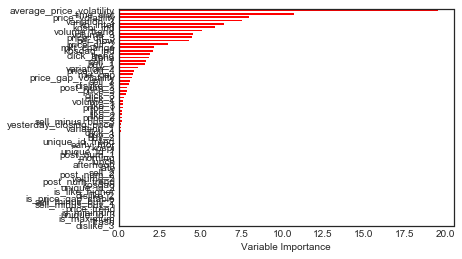

In [139]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [170]:
cut_var = rel_imp[rel_imp > 0]

In [171]:
X_train_sub = X_train[cut_var.index]
X_test_sub = X_test[cut_var.index]

In [172]:
cut_var

buy_2                        0.063080
buy_3                        0.080863
click_1                      0.116883
variation_1                  0.128117
yesterday_closing_price      0.133127
sell_minus_buy_3             0.188152
price_2                      0.198337
like_2                       0.212610
like_1                       0.214039
price_1                      0.254698
like_3                       0.275778
volume_1                     0.292593
click_2                      0.310064
click_3                      0.456634
price_3                      0.522434
post_num_3                   0.525353
dislike_1                    0.615982
sell_3                       0.714129
price_gap_volatility         0.809871
mkt_cap                      0.874286
price_dif_1                  0.929856
variation_2                  1.151138
buy_1                        1.628000
sell_1                       1.647583
alpha                        1.868084
click_trend                  1.933559
kosdaq_ind  